In [9]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re
import matplotlib as mpl
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
data= pd.read_csv("C://Users/Saba Naseem/Desktop/Machine Learning/Codes/kaggle/Document Clustering/movies.csv")

In [3]:
data.head()

,title,link,syn_link,genres,plot_synopsis
0,The Shawshank Redemption,https://www.imdb.com/title/tt0111161/?pf_rd_m=...,https://www.imdb.com/title/tt0111161/synopsis?...,[' Drama'],"In 1947, Andy Dufresne (Tim Robbins), a banker..."
1,The Godfather,https://www.imdb.com/title/tt0068646/?pf_rd_m=...,https://www.imdb.com/title/tt0068646/synopsis?...,"[' Crime', ' Drama']","In late summer 1945, guests are gathered for t..."
2,The Godfather: Part II,https://www.imdb.com/title/tt0071562/?pf_rd_m=...,https://www.imdb.com/title/tt0071562/synopsis?...,"[' Crime', ' Drama']",The Godfather Part II presents two parallel st...
3,The Dark Knight,https://www.imdb.com/title/tt0468569/?pf_rd_m=...,https://www.imdb.com/title/tt0468569/synopsis?...,"[' Action', ' Crime', ' Drama', ' Thriller']",The movie begins with a gang of men with clown...
4,12 Angry Men,https://www.imdb.com/title/tt0050083/?pf_rd_m=...,https://www.imdb.com/title/tt0050083/synopsis?...,[' Drama'],"In a New York City courthouse, an eighteen-yea..."


In [4]:
data.columns

Index(['title', 'link', 'syn_link', 'genres', 'plot_synopsis'], dtype='object')

In [5]:
title, synopsis, genre= data['title'], data['plot_synopsis'], data['genres']

In [13]:
synopsis[0][:200]

'In 1947, Andy Dufresne (Tim Robbins), a banker in Maine, is convicted of murdering his wife and her lover, a golf pro. Since the state of Maine has no death penalty, he is given two consecutive life s'

In [17]:
ranks = []

for i in range(0,len(title)):
    ranks.append(i)

## Text Preprocessing
#### Tokenizing & Stemming

`Tokenizing` is a process to break an input stream of text into tokens. A token can be a `sentence` or an individual `word`.

`Stemming` is a process of removing `affixes` from a word. For example, a word "Unbelievable" has stem "believe" and `prefix` "un" and `suffix` "able".

So in this step, we are making tokens of our text and applying stemming process to chop off affixes from words. 

In [6]:
def tokenizing(text):
    
    #breaking each word and making them tokens
    tokens=[word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    
    #storing only alpha tokens
    filtered_tokens=[]
    for token in tokens:
        if (re.search('[a-zA-Z]', token)):
            filtered_tokens.append(token)

    return filtered_tokens


from nltk.stem.snowball import SnowballStemmer
stemmer= SnowballStemmer("english")

def stemming(text):
    
    stems =[stemmer.stem(t) for t in text]
    return stems

def token_stems(text):
        
    tokens=tokenizing(text) 
    stems=stemming(tokens)
   
    return stems       

In [119]:
a= token_stems(synopsis[0])
a[:10]

['in', 'andi', 'dufresn', 'tim', 'robbin', 'a', 'banker', 'in', 'main', 'is']

In [7]:
tokenized_only_vocab=[ tokenizing(word) for word in synopsis]
stemmed_vocab=[ stemming(token) for token in tokenized_only_vocab]

NameError: name 're' is not defined

In [86]:
len(stemmed_vocab), len(tokenized_only_vocab)

(100, 100)

## TF-IDF vectorization

`TF-IDF` stands for Term Frequency- Inverse Document Frequency.

`TF` measures how frequently a term occurs in a document.  Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length as a way of normalization:

*TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)*

`IDF` measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

*IDF(t) = log_e(Total number of documents / Number of documents with term t in it)*

In [10]:
tfidf= TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2, stop_words='english',
                      use_idf=True, tokenizer=token_stems, ngram_range=(1,3))

tfidf_matriz= tfidf.fit_transform(synopsis)

print(tfidf_matriz.shape)

terms=tfidf.get_feature_names()

(100, 612)


*`Cosine similarity` is measured against the tf-idf matrix and can be used to generate a measure of similarity between each document and the other documents in the corpus (each synopsis among the synopses)*

In [11]:
dist = 1 - cosine_similarity(tfidf_matriz)

In [46]:
t=tfidf.vocabulary_

In [48]:
aa=tfidf.stop_words_

## K Mean Clustering

`K-means` is used when we have unlabeled data and our goal is to find groups in the data, called `clusters` with the number of clusters represented by the variable `K`. This algorithm works iteratively to assign each data point to one of K clusters based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

* The `centroids` of the K clusters, which can be used to label new data
* Labels for the training data (each data point is assigned to a single cluster)

In [13]:
kmean= KMeans(5)

kmean.fit(tfidf_matriz)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

`lables_` returns labels of each document.

In [14]:
clusters= kmean.labels_
clusters

array([2, 1, 1, 3, 1, 4, 4, 1, 3, 3, 4, 1, 3, 1, 4, 3, 1, 2, 4, 1, 1, 3,
       1, 2, 1, 2, 3, 2, 3, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 3, 2, 4, 1, 4, 1, 3, 1, 1, 4, 1, 1, 4, 4, 3, 2, 2, 2, 2, 4, 1,
       3, 1, 3, 1, 1, 3, 2, 4, 1, 2, 2, 4, 1, 0, 1, 0, 2, 1, 4, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 3, 3, 1, 2, 1, 1])

In [96]:
films=pd.DataFrame({'title': title, 'rank': ranks, 'synopsis': synopsis, 'cluster': clusters, 'genre': genre})

films.head()

,title,rank,synopsis,cluster,genre
0,The Shawshank Redemption,0,"In 1947, Andy Dufresne (Tim Robbins), a banker...",2,[' Drama']
1,The Godfather,1,"In late summer 1945, guests are gathered for t...",2,"[' Crime', ' Drama']"
2,The Godfather: Part II,2,The Godfather Part II presents two parallel st...,2,"[' Crime', ' Drama']"
3,The Dark Knight,3,The movie begins with a gang of men with clown...,1,"[' Action', ' Crime', ' Drama', ' Thriller']"
4,12 Angry Men,4,"In a New York City courthouse, an eighteen-yea...",4,[' Drama']


In [27]:
films['cluster'].value_counts()

4    29
1    28
2    23
3    14
0     6
Name: cluster, dtype: int64

## Visualization of Clusters.

First let's find cluster names the words that are closest to each cluster centroid.

In [97]:
order_centroids = kmean.cluster_centers_.argsort()[:, ::-1]

for i in range(5):
    print("Cluster",i,": ")
    for j in order_centroids[i, :10]:
        print(' %s' % terms[j])  

Cluster 0 : 
 war
 soldier
 kill
 men
 armi
 command
 shoot
 film
 order
 offic
Cluster 1 : 
 say
 n't
 ask
 car
 man
 polic
 come
 doe
 room
 look
Cluster 2 : 
 ship
 destroy
 ring
 captain
 forc
 armi
 power
 kill
 battl
 death
Cluster 3 : 
 evid
 boy
 defend
 murder
 wit
 chang
 film
 question
 reason
 decid
Cluster 4 : 
 famili
 father
 kill
 son
 friend
 daughter
 meet
 live
 visit
 ask


`MDS` Multidimensional scaling.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


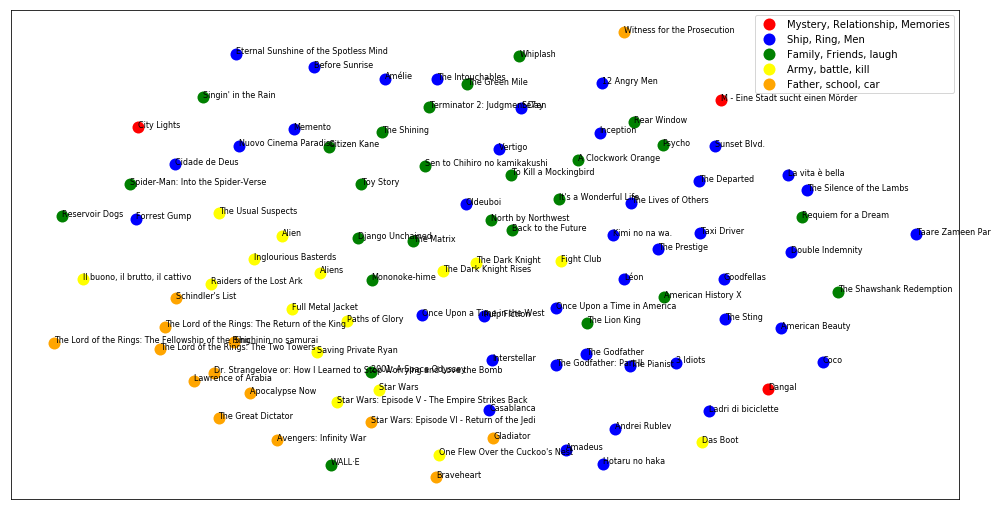

In [24]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)

xs, ys = pos[:, 0], pos[:, 1]

cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'orange'}

cluster_names = {0: 'Mystery, Relationship, Memories', 
                 1: 'Ship, Ring, Men', 
                 2: 'Family, Friends, laugh', 
                 3: 'Army, battle, kill', 
                 4: 'Father, school, car'}


df = pd.DataFrame({'x': xs, 'y':ys, 'label':clusters, 'title':title}) 

groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(17, 9)) 

ax.margins(0.05) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend(numpoints=1)

for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  
    
plt.show()